In [1]:
# project: p8
# submitter: ychung66
# partner: hkim876 

In [2]:
import csv

def get_mapping(path):
    map_file = open(path)
    map_reader = csv.reader(map_file)
    map_data = list(map_reader)
    
    map_dict = {}
    for i in map_data:
        map_dict[i[0]] = i[1]
    return map_dict

In [3]:
#q1: what is returned by your get_mapping("small_mapping.csv") function?
mapping = get_mapping("small_mapping.csv")
mapping

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [4]:
#q2: what is the value associated with the key "nm0752751"?
mapping["nm0752751"]

'Mitchell Ryan'

In [5]:
#q3: what are the values in the mapping associated with keys beginning with "nm"?
begin_nm = []
for keys in mapping:
    if "nm" in keys:
        begin_nm.append(mapping[keys])
begin_nm

['John Cusack',
 'Mel Gibson',
 'Dustin Hoffman',
 'Danny Glover',
 'Gene Hackman',
 'Gary Busey',
 'Richard Donner',
 'Gary Fleder',
 'Mitchell Ryan']

In [6]:
#q4: which keys in the mapping map to people with a first name of "Gary"?
#Answer with a Python list. 
#To get full points, you should write code that will count somebody named "gary" but will not count somebody named "Garyyy".

list_gary = []
for val in mapping:
    if "gary" in mapping[val].lower():
        list_gary.append(val)

list_gary

['nm0000997', 'nm0001219']

In [7]:
def get_raw_movies(path):
    raw_file = open(path)
    raw_reader = csv.reader(raw_file)
    raw_data = list(raw_reader)
    
    
    header = raw_data[0]
    raw_movies = raw_data[1:]
    movies = []
    new_list = []
      
    for raw_movie in raw_movies:
        movie_dict = {}
        for i in range(len(header)):
            movie_dict[header[i]] = raw_movie[i]
            
        for keys in movie_dict:
            if keys == 'title':
                movie_dict[keys] = movie_dict[keys]
            if keys == 'year':
                movie_dict[keys] = int(movie_dict[keys])
            if keys == 'rating':
                movie_dict[keys] = float(movie_dict[keys])
            if keys == 'directors':
                movie_dict[keys] = list(movie_dict[keys].split(','))
            if keys == 'actors':
                movie_dict[keys] = list(movie_dict[keys].split(','))
            if keys == 'genres':
                movie_dict[keys] = list(movie_dict[keys].split(','))
        new_list.append(movie_dict)
        
    return new_list

In [8]:
#q5: what does get_raw_movies("small_movies.csv") return?
get_raw_movies("small_movies.csv")

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [9]:
#q6: how many genres did the movie at index 0 have?
small_movies = get_raw_movies("small_movies.csv")
len(small_movies[0]['genres'])

3

In [10]:
#q7: what is the ID of the last actor listed for the move at index 1? 
x = small_movies[1]['actors']
x[len(small_movies[1]['actors'])-1]

'nm0752751'

In [11]:
#loads data from the movies_path file using get_movies_raw 
#and converts the IDs to names using a mapping based on the mapping_path file, 
#which you should load using your get_mapping function.

def get_movies(movies_path, mapping_path):
    movies = get_raw_movies(movies_path)
    mapping = get_mapping(mapping_path)
    #print(movies)
    #print(mapping)
   
    for movie in movies:
        for keys in movie:
            
            if keys == 'title':
                movie[keys] = mapping[movie[keys]]
                
            if keys == 'directors' or keys == 'actors':
                list_name = []
                for key in movie[keys]:
                    list_name.append(mapping[key])
                movie[keys] = list_name

    
    return movies
                
small = get_movies("small_movies.csv", "small_mapping.csv")

In [12]:
#q8: what is small[0]["title"]?

small[0]["title"]

'Runaway Jury'

In [13]:
#q9: what is small[1]["actors"]?
small[1]["actors"]

['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan']

In [14]:
#q10: what is small[-1]["directors"]?
small[-1]["directors"]

['Richard Donner']

In [15]:
#q11: what is small?
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [16]:
#q12: what are the first 3 rows in movies?
movies = get_movies("movies.csv", "mapping.csv")
movies[0:3]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']},
 {'title': 'The Barefoot Executive',
  'year': 1971,
  'rating': 6.0,
  'directors': ['Robert Butler'],
  'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
  'genres': ['Comedy', 'Family']}]

In [17]:
#q13: what are the last 3 rows in movies?
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [18]:
# you are not allowed to change this function
import copy
def filter_movies_by_year(movies, year):
    movie = copy.copy(movies)
    i = 0
    while i < len(movie):
        if movie[i]["year"] != year:
            movie.pop(i)
        else:
            i += 1
    return movie

In [19]:
#q14: what are the movies from 1931?
filter_movies_by_year(movies, 1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [20]:
# q15: what are the movies from 1932
filter_movies_by_year(movies, 1932)

[{'title': 'Texas Cyclone',
  'year': 1932,
  'rating': 6.2,
  'directors': ['D. Ross Lederman'],
  'actors': ['Wallace MacDonald', 'Tim McCoy', 'Wheeler Oakman', 'John Wayne'],
  'genres': ['Action', 'Western']},
 {'title': 'Haunted Gold',
  'year': 1932,
  'rating': 5.5,
  'directors': ['Mack V. Wright'],
  'actors': ['Otto Hoffman',
   'John Wayne',
   'Duke',
   'Harry Woods',
   'Erville Alderson'],
  'genres': ['Horror', 'Mystery', 'Western']},
 {'title': 'Girl Crazy',
  'year': 1932,
  'rating': 6.3,
  'directors': ['William A. Seiter'],
  'actors': ['Bert Wheeler', 'Robert Woolsey', 'Eddie Quillan'],
  'genres': ['Comedy']},
 {'title': 'Hot Saturday',
  'year': 1932,
  'rating': 6.6,
  'directors': ['William A. Seiter'],
  'actors': ['Cary Grant', 'Randolph Scott', 'Edward Woods'],
  'genres': ['Drama', 'Romance']},
 {'title': 'Lady and Gent',
  'year': 1932,
  'rating': 5.7,
  'directors': ['Stephen Roberts'],
  'actors': ['Morgan Wallace',
   'George Bancroft',
   'Charles St

In [21]:
def unique(header):
    movie_list = []
    for movie in movies:
        if len(movie[header]) != 0:
            for i in range(len(movie[header])):
                 if movie[header][i] not in movie_list:
                    movie_list.append(movie[header][i])    
        else:
            for i in range(len(movie[header])):
                 if movie[header][i] not in movie_list:
                    movie_list.append(movie[header][i])
    return len(movie_list)

In [22]:
# q16: how many unique genres are there in the dataset?
unique("genres")

18

In [23]:
# q17: how many unique director names are there in the dataset?
unique("directors")

1247

In [24]:
# q18: which movie has the highest number of actors? Output should be the movie title in string format.
max=0
for x in range(len(movies)):
    if len(movies[x]["actors"])>max:
        I = x
        max = len(movies[x]["actors"])        
movies[I]["title"]

'Shoulder Arms'

In [25]:
# q19: what is the average movie rating?
totalrating = 0
for x in movies:
    totalrating += x['rating']
totalrating/len(movies)   

6.401659528907912

In [26]:
# q20: what is the longest movie title in the dataset (in terms of most characters)?
max = 0

for movie in movies:
    if len(movie['title']) > max:
        max = len(movie['title'])
        title = movie['title']
        
title 

'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'

In [27]:
def bucketize(movie_list, movie_key):
    new_dict= {}
    for partial_dict in movie_list:
        if movie_key != "genres":
            if partial_dict[movie_key] not in new_dict:
                new_dict[partial_dict[movie_key]] = [partial_dict]          
            else:
                new_dict[partial_dict[movie_key]].append(partial_dict) 
        else:
            for i in range(len(partial_dict[movie_key])):
                if partial_dict[movie_key][i] not in new_dict:
                    new_dict[partial_dict[movie_key][i]] = [partial_dict]
                else:
                    new_dict[partial_dict[movie_key][i]].append(partial_dict)        
                 
    return new_dict

In [28]:
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

In [29]:
# q21: what is bucketize(test_movies, "year")?
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [30]:
# q22: what is bucketize(test_movies, "style")?
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [31]:
# q23: what is bucketize(test_movies, "genres")?
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [32]:
# q24: what is bucketize(small, "genres")?
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [34]:
# q25: how many different unique actors appear in the small dataset?
len(bucketize(small, "actors"))

TypeError: unhashable type: 'list'

In [ ]:
# q26: how many unique actors appear in the full dataset?

#for this and all remaining questions, 
#answer with respect to the full dataset referenced by the movies variable 
#from stage 1 (we'll ask nothing more regarding small or test_movies).


len(bucketize(movies, "actors"))

In [35]:
# q27: how many movies are there of each genre?
movie_genre = {}
for keys in bucketize(movies, "genres"):
    movie_genre[keys] = len(bucketize(movies, "genres")[keys])
movie_genre

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [36]:
%matplotlib inline

In [37]:
import matplotlib, pandas

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

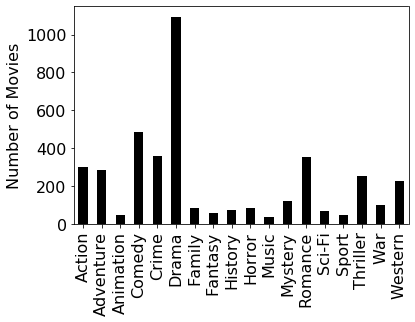

In [38]:
#q28: how many movies are there of each genre? (plot your answer)
plot_dict(movie_genre, label='Number of Movies')

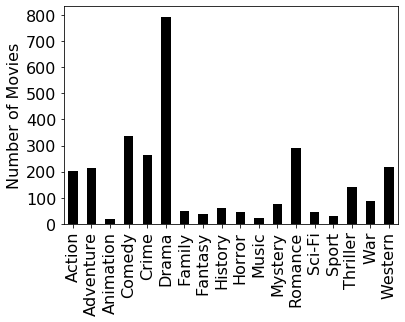

In [39]:
#q29: how many movies are there of each genre, prior to 2000? (plot your answer)
movies_prior_2000 = {}

for keys in bucketize(movies, "genres"):
    for i in range(len(bucketize(movies, "genres")[keys])):
        if bucketize(movies, "genres")[keys][i]["year"] < 2000:
            if keys not in movies_prior_2000:
                movies_prior_2000[keys] = 0
            else:
                movies_prior_2000[keys] += 1

plot_dict(movies_prior_2000, label='Number of Movies')

#plot_dict(bucket_counts(filter_year(movies, None, 1999), "genres"), "Movie Count")

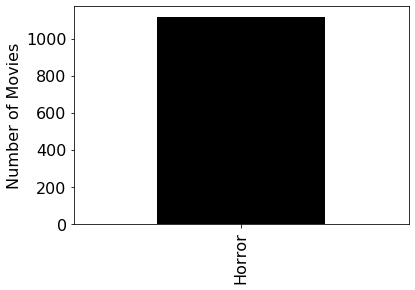

In [40]:
#q30: how many movies are there of each genre, in or after 2000? (plot your answer)
movies_after_2000 = {}
bucket = bucketize(movies, "genres")
for genre_keys in bucket:
    for i in range(len(bucket[genre_keys])):
        if bucket[genre_keys][i]["year"] >= 2000:
            if keys not in movies_after_2000:
                movies_after_2000[keys] = 0
            else:
                movies_after_2000[keys] += 1
plot_dict(movies_after_2000, label='Number of Movies')

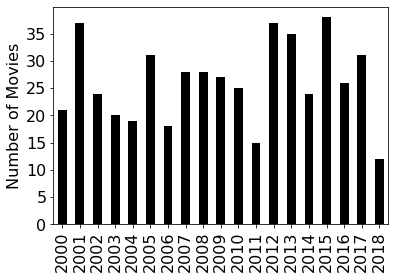

In [41]:
#q31: how many movies have there been per year, since (and including) 2000? (plot your answer)
movies_per_year = {}
for keys in bucketize(movies, "year"):
    if keys >= 2000:
        if keys not in movies_per_year:
            movies_per_year[keys] = len(bucketize(movies, "year")[keys])
plot_dict(movies_per_year, label='Number of Movies')

In [42]:
#q32: what are the directing career spans of the directors who have directed for at least 30 years?
directors = bucketize(movies, "directors")
directors_career = {}
for x in directors:
    if len(directors[x]) > 1:
        F = directors[x][0]['year']
        L = directors[x][0]['year']
        for m in directors[x]:
            if m['year'] < F:
                F = m['year']
            if m['year'] > L:
                L = m['year']
        career = L - F
        if career >= 30:
            directors_career[x] = career
directors_career

TypeError: unhashable type: 'list'

In [ ]:
#q33: what are the acting career spans of the actors who have acted for at least 50 years?
actors = bucketize(movies, "actors")
actors_dict = {}
for x in actors:
    if len(actors[x]) > 1:
        F = actors[x][0]['year']
        L = actors[x][0]['year']
        for m in actors[x]:
            if m['year'] < F:
                F = m['year']
            if m['year'] > L:
                L = m['year']
        career = L - F
        if career >= 50:
            actors_dict[x] = career
            
actors_dict

In [ ]:
def row_ranking(row):
    return row["span"]
def top_n_span(buckets, n):
    s = buckets
    r = []
    for name in s:
        span = s[name]
        r.append({"name": name, "span": span})
    r.sort(key=row_ranking, reverse=True)
    return r[:n]

In [ ]:
#q34: who are the 10 directors with the longest careers?
directors = bucketize(movies, "directors")
directors_career = {}
for x in directors:
    if len(directors[x]) > 1:
        F = directors[x][0]['year']
        L = directors[x][0]['year']
        for m in directors[x]:
            if m['year'] < F:
                F = m['year']
            if m['year'] > L:
                L = m['year']
        career = L - F
        if career >= 0:
            directors_career[x] = career
directors_career

top_n_span(directors_career, 10)

In [ ]:
#Q35: who are the 10 actors with the longest careers?

actors = bucketize(movies, "actors")
actors_dict = {}
for x in actors:
    if len(actors[x]) > 1:
        F = actors[x][0]['year']
        L = actors[x][0]['year']
        for m in actors[x]:
            if m['year'] < F:
                F = m['year']
            if m['year'] > L:
                L = m['year']
        career = L - F
        if career >= 0:
            actors_dict[x] = career
            
actors_dict

top_n_span(actors_dict, 10)

In [ ]:
#q36: what are the three genres in which movies receive the highest median rating?
def row_ranking(row):
    return row["rating"]

def find_median(list):
    if (len(list) % 2):
        return sorted(list)[(len(list) - 1) // 2]
    else:
        return (sorted(list)[(len(list) - 1) // 2] + sorted(list)[(len(list) - 1) // 2 + 1])/2
    
def top_ratings_1(bucketize, n):
    final_list = []
    for keys in bucketize:
        rating_list = []
        for movie in bucketize[keys]:
            rating_list.append(movie['rating'])
        rating_list.sort()
        d = {"category": keys, "rating":find_median(rating_list), "count":len(rating_list)}
        final_list.append(d)
    final_list.sort(key = row_ranking, reverse=True)
    return final_list[:n]
top_ratings_1(bucketize(movies, "genres"), 3)

In [ ]:
#q37: what were the 10 best years for movies?
top_ratings_1(bucketize(movies, "year"), 10)

In [ ]:
#q38: what were the 5 best years for movies, if we only consider years with at least 10 movies?
def top_ratings_2(bucketize, n, y):
    final_list = []
    for keys in bucketize:
        rating_list = []
        for movie in bucketize[keys]:
            rating_list.append(movie['rating'])
        rating_list.sort()
        if len(rating_list) >= y:
            d = {"category": keys, "rating":find_median(rating_list), "count":len(rating_list)}
            final_list.append(d)
    final_list.sort(key = row_ranking, reverse=True)
    return final_list[:n]
top_ratings_2(bucketize(movies, "year"), 5, 10)

In [ ]:
#q39: who are the best 4 directors, if we only count directors having at least 3 movies?
top_ratings_2(bucketize(movies, "directors"), 4, 3)

In [ ]:
#q40: who are the 3 best actors, if we only count actors having at least 5 movies?
top_ratings_2(bucketize(movies, "actors"), 3, 5)